# The Influence of Air Pollution on Sialia Sialis

##### Author: Ruixin Chen, Hang Yu

### Abstract: 
  This study investigates the influence of air pollution on the population of Sialia sialis, an endemic species in Florida and Texas. Utilizing data from 2001 to 2023 sourced from GBIF and the United States Environmental Protection Agency, we conducted exploratory data analysis (EDA) to examine correlations between various air pollution indices (ozone, carbon monoxide, sulfur dioxide, nitrogen dioxide, PM10, and PM2.5) and the population of Sialia sialis. Our research questions aimed to determine negative correlations between air pollution indices and the bird population, assessed through Pearson correlation coefficients. We employed statistical methods and data visualization techniques, including histograms, box plots, scatter plots, and heatmap analysis, to understand the relationships comprehensively. Additionally, we compared the influence of air pollution across different habitats (Florida and Texas). The findings provide insights into the impact of human-induced air pollution on local ecosystems and offer valuable implications for ecological conservation efforts.

### Introduction:
The rapid escalation of human activities has inevitably altered natural environments, leading to significant repercussions on biodiversity. According to BirdLife International, the last 500 years witnessed the extinction of 160 bird species, with only 6% of avian populations maintaining stability. Among these, Sialia sialis, an endemic species in Florida and Texas, holds a critical position as a small predator in local food chains. This study aims to investigate the extent of air pollution's impact on the population of Sialia sialis and its implications for local ecosystems. By analyzing data spanning from 2001 to 2023 sourced from GBIF and the United States Environmental Protection Agency, we seek to identify correlations between various air pollution indices and the population dynamics of Sialia sialis. Through exploratory data analysis (EDA), including statistical analysis and data visualization, we aim to elucidate the relationships and assess the degree of influence of different air pollutants. The research questions delve into examining negative correlations between ozone, carbon monoxide, sulfur dioxide, nitrogen dioxide, PM10, PM2.5 concentrations, and the population of Sialia sialis. By categorizing air pollution indices based on their impact using Pearson correlation coefficients, we aim to delineate thresholds where minimal influence on bird populations coincides with sustainable human activities. This study's findings are crucial for informing environmental policies, conservation strategies, and habitat management practices to safeguard local ecosystems and mitigate the adverse effects of air pollution on avian biodiversity.

### Research Approach
* Data Collection:
 * Bird Population Data: Scraping data of Sialia sialis populations from 2001 to 2023 from the GBIF website.
 * Air Pollution Data: Retrieving air pollution data from 2001 to 2023, including ozone, carbon monoxide, sulfur dioxide, nitrogen dioxide, PM10, and PM2.5 concentrations, from the United States Environmental Protection Agency (EPA) website.
* Data Storage and Processing:
 * Storing the collected data in a PostgreSQL database and uploading processed CSV files to GitHub for accessibility.
 * Utilizing Pandas library functions for data processing, including handling missing values, outliers, and data type conversions.
* Machine Learning Predictions:
 * Applying machine learning algorithms, such as Random Forest Regressor, to predict missing values in observation rates based on other air pollution parameters.
 * Filling in missing observation rate values using predicted values to ensure data completeness.
* Exploratory Data Analysis (EDA):
 * Conducting EDA to address research questions, including correlation analysis, data visualization, and statistical analysis.
 * Exploring the relationships between air pollution indices and Sialia sialis population dynamics using scatter plots, box plots, and histograms.
 * Reviewing data quality and integrity to ensure it meets research requirements.
* Statistical Analysis:
 * Utilizing statistical methods such as Pearson correlation coefficient analysis to quantify the relationships between air pollution indices and Sialia sialis populations.
 * Comparing Pearson correlation coefficients to assess the degree of influence of different air pollutants on bird populations.
* Data Visualization:
 * Generating visualizations including line plots, scatter plots, box plots, and heatmaps to illustrate trends, correlations, and distributions in the data. 
 * Visualizing observation rate trends over time and comparing air pollution levels between Texas and Florida.
* Interpretation and Conclusion:
 * Interpreting the findings from data analysis to draw conclusions regarding the influence of air pollution on Sialia sialis populations.
 * Summarizing the research outcomes and implications for local ecosystems, conservation efforts, and environmental policies.
 * Providing recommendations for ecological restoration and pollution control measures based on research findings.

We use the Neo4j database to store the data we need.

The following is a code example for importing a certain year. When using it, we modify the years to import data one by one and create nodes. (Where xxxx should be the year)

LOAD CSV WITH HEADERS FROM "https://github.com/MarcyChen-ruixin/AIM-5001/raw/main/Sxxxx.csv" AS row

CREATE (:SO2 {value: row.SO2})-[:HAS_SO2]->(:Year {year: "xxxx"})

WITH row, split(row.State, ",") AS states

UNWIND states AS state

MERGE (:State {name: state})-[:HAS_SO2]->(:SO2 {value: row.SO2});

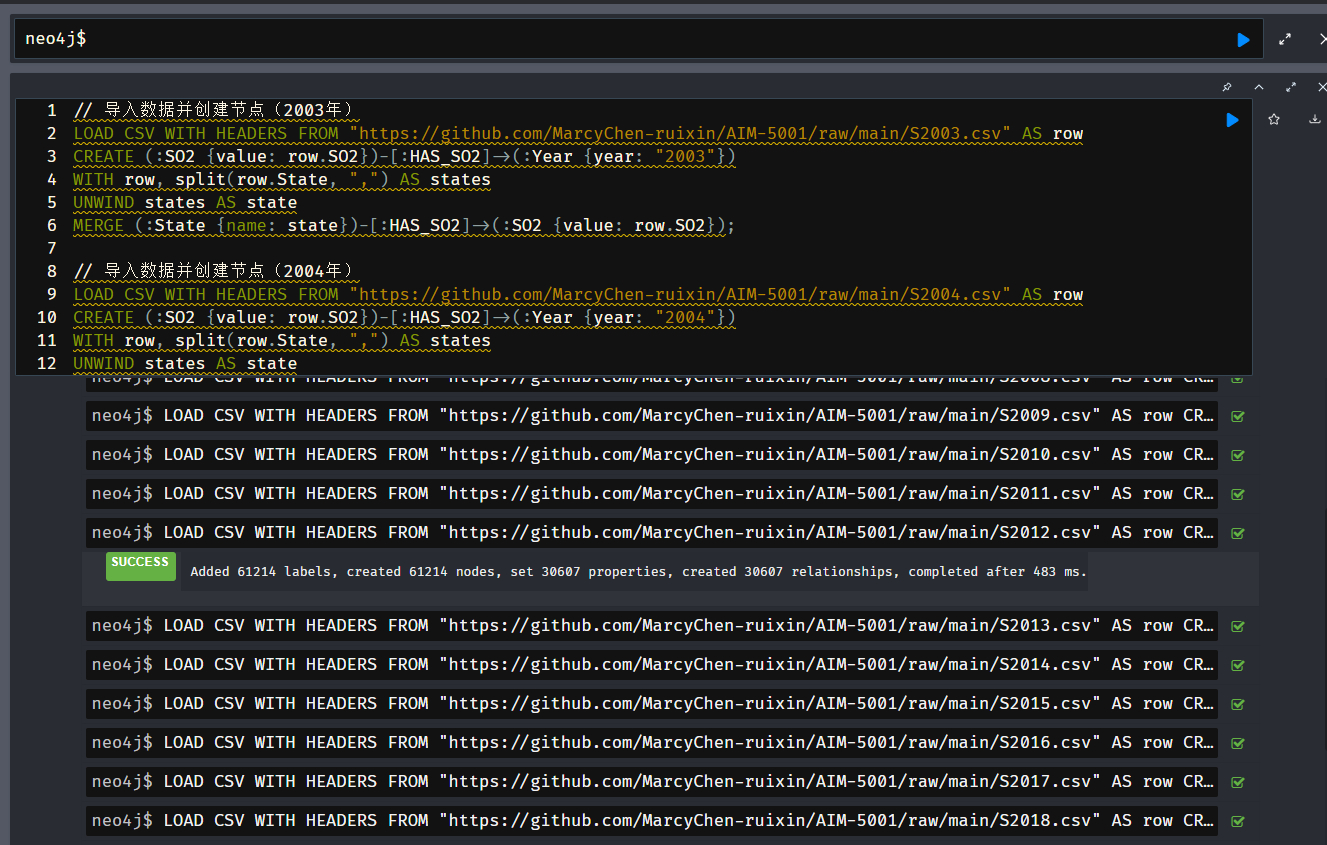

The following is a code example for establishing connections between data for a certain year. When using it, we modify the years to create various connections. (Where xxxx should be the year)

MATCH (sxxxx:SO2)-[:HAS_SO2]->(yxxxx:Year {year: "xxxx"})

MATCH (state:State)-[:HAS_SO2]->(sxxxx)

MERGE (yxxxx)-[:MEASURED_IN]->(state);


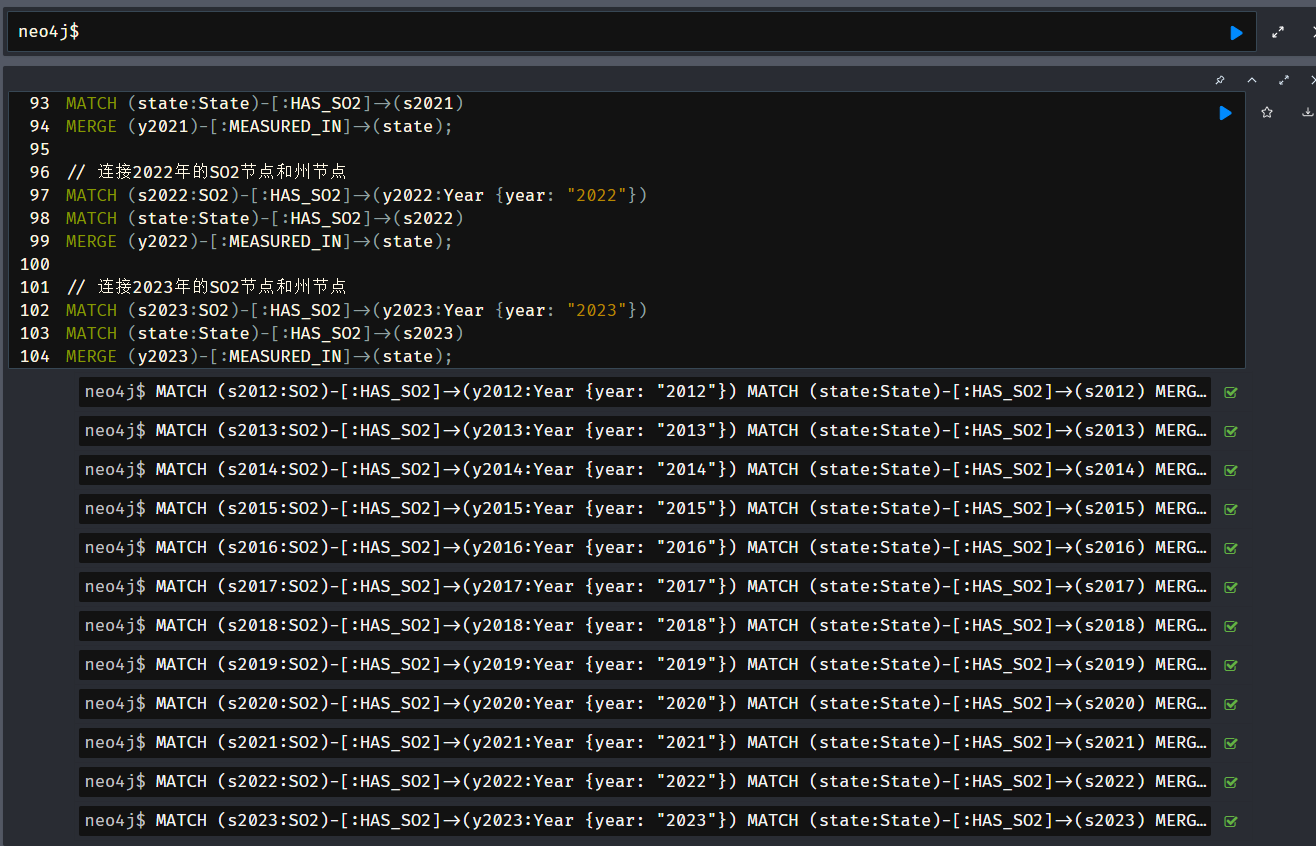

Visualization diagram：

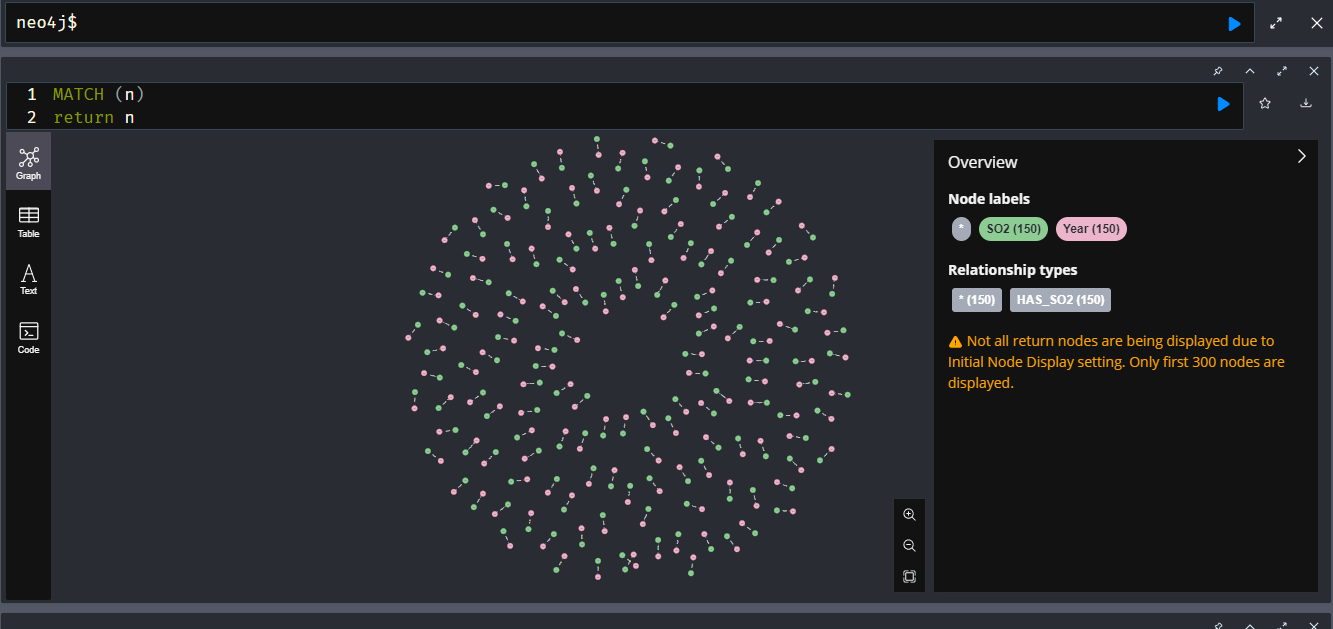

We accessed the Global Biodiversity Information Facility (GBIF) API to retrieve annual observation rate data for specific bird species across different states in the United States. In this process, we first defined two functions: find_bird to search for bird information and bird_observation_rate to calculate the observation rate of birds in each state. Then, we utilized list comprehension to construct a data list containing observation rate data for each state from 2003 to 2023. Finally, we transformed the data into a DataFrame using pandas and plotted a line graph using matplotlib.pyplot to display the trend of observation rates over time.

In [26]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
def find_bird(bird_name, year, country="US"):
    url = f"https://api.gbif.org/v1/species/match?name={bird_name}"
    try:
        res1 = requests.get(url)
        res1.raise_for_status()
        bird_data = res1.json()
        bird_key = bird_data.get('usageKey')
        if bird_key:
            url2 = f"https://api.gbif.org/v1/occurrence/search?taxonKey={bird_key}&year={year}&country={country}"
            res2 = requests.get(url2)
            res2.raise_for_status()
            bird_data2 = res2.json()
            return bird_data2
        else:
            print("Didn't find that kind of bird.")
            return None
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return None

def bird_observation_rate(bird_data2):
    bird_counts = {}
    total_bird = bird_data2['count']
    for record in bird_data2['results']:
        state = record.get('stateProvince')
        bird_counts[state] = bird_counts.get(state, 0) + 1
    relative_rates = {}
    for state, count in bird_counts.items():
        relative_rate = count / total_bird
        relative_rates[state] = relative_rate
    return relative_rates

bird_name = "Sialia sialis"
data_list = [{'Year': year, 'State': state, 'Observation Rate': rate}
             for year in range(2003, 2024)
             for state, rate in bird_observation_rate(find_bird(bird_name, year)).items()]

df1 = pd.DataFrame(data_list, columns=['Year', 'State', 'Observation Rate'])


In [27]:
df1

,Year,State,Observation Rate
0,2003,Ohio,0.000222
1,2003,Kansas,0.000055
2,2003,New York,0.000222
3,2003,North Carolina,0.000055
4,2003,Virginia,0.000222
...,...,...,...
199,2023,Alabama,0.000001
200,2023,Ohio,0.000001
201,2023,Texas,0.000001
202,2023,Maryland,0.000001


First, we converted df1 into wide format for subsequent data manipulation. Then, we calculated the number of missing values for each state across all years and selected the two states with the least missing values, storing them in the variable least_nan. Next, we extracted the observation rate data for these two states and stored them in final_data. Finally, we stored the data for Texas and Florida in variables Texas and Florida respectively.

In [28]:
df_wide=df1.pivot(index=['Year'],columns='State',values=['Observation Rate'])

In [29]:
nan=df_wide.isnull().sum()
least_nan=nan.sort_values().head(2).index
final_data=df_wide[least_nan]
Texas=df_wide[least_nan[0]]
Florida=df_wide[least_nan[1]]
final_data

Observation Rate          
State            Texas   Florida
Year                            
2003          0.000111  0.000111
2004          0.000097  0.000048
2005               NaN       NaN
2006               NaN  0.000026
2007          0.000043  0.000022
2008          0.000108  0.000018
2009          0.000026  0.000013
2010          0.000012       NaN
2011          0.000037  0.000028
2012          0.000036  0.000012
2013          0.000020  0.000005
2014          0.000013  0.000009
2015          0.000057       NaN
2016          0.000026  0.000006
2017          0.000021  0.000005
2018          0.000020  0.000004
2019          0.000009  0.000002
2020          0.000002  0.000002
2021          0.000004  0.000001
2022          0.000008  0.000002
2023          0.000001       NaN

First, we constructed a list of URLs containing files for air quality data for each year. Then, we iterated through each file to retrieve its data and converted it into a DataFrame. Next, we used pd.concat() to merge all the data into one DataFrame. Finally, we filtered out rows from the merged DataFrame where the state is either 'Texas' or 'Florida', and stored them in final_air_df.

In [30]:
first_url="https://raw.githubusercontent.com/MarcyChen-ruixin/AIM-5001/main/"
csv_files=["annual_aqi_by_county_2003.csv","annual_aqi_by_county_2004.csv","annual_aqi_by_county_2005.csv","annual_aqi_by_county_2006.csv","annual_aqi_by_county_2007.csv","annual_aqi_by_county_2008.csv","annual_aqi_by_county_2009.csv","annual_aqi_by_county_2010.csv","annual_aqi_by_county_2011.csv","annual_aqi_by_county_2012.csv","annual_aqi_by_county_2013.csv","annual_aqi_by_county_2014.csv","annual_aqi_by_county_2015.csv","annual_aqi_by_county_2016.csv","annual_aqi_by_county_2017.csv","annual_aqi_by_county_2018.csv","annual_aqi_by_county_2019.csv","annual_aqi_by_county_2020.csv","annual_aqi_by_county_2021.csv","annual_aqi_by_county_2022.csv","annual_aqi_by_county_2023.csv",]
dataframes=[]
for file in csv_files:
    url=first_url+file
    response=requests.get(url)
    csv_data=StringIO(response.text)
    df=pd.read_csv(csv_data)
    dataframes.append(df)
Air_df=pd.concat(dataframes, ignore_index=True)
final_air_df=Air_df[(Air_df['State']=='Texas')|(Air_df['State']=='Florida')]
final_air_df

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
164,Florida,Alachua,2003,365,306,52,7,0,0,0,147,60,37,0,0,298,60,7
165,Florida,Baker,2003,359,322,30,7,0,0,0,133,51,33,0,0,359,0,0
166,Florida,Bay,2003,359,266,70,20,3,0,0,185,84,38,0,0,289,61,9
167,Florida,Brevard,2003,365,322,36,7,0,0,0,147,53,36,0,0,321,25,19
168,Florida,Broward,2003,365,295,67,3,0,0,0,112,56,38,10,39,133,182,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21930,Texas,Tarrant,2023,182,86,87,9,0,0,0,143,87,51,1,4,76,101,0
21931,Texas,Travis,2023,182,101,78,3,0,0,0,122,72,48,1,0,82,99,0
21932,Texas,Victoria,2023,205,201,4,0,0,0,0,71,44,31,0,0,205,0,0
21933,Texas,Webb,2023,182,111,69,2,0,0,0,112,71,44,1,0,103,76,2


First, we defined a list of URLs SO2_urls containing files for SO2 data for each year. Then, we iterated through each URL, read the corresponding CSV file, performed data filtering, and calculated the average SO2 values for Florida and Texas states. We stored these averages in FLO_SO2_df and Texas_SO2_df respectively. Finally, we presented the results.

In [31]:
SO2_urls = [
    "https://github.com/MarcyChen-ruixin/AIM-5001/raw/main/S2003.csv",
    "https://github.com/MarcyChen-ruixin/AIM-5001/raw/main/S2004.csv",
    "https://github.com/MarcyChen-ruixin/AIM-5001/raw/main/S2005.csv",
    "https://github.com/MarcyChen-ruixin/AIM-5001/raw/main/S2006.csv",
    "https://github.com/MarcyChen-ruixin/AIM-5001/raw/main/S2007.csv",
    "https://github.com/MarcyChen-ruixin/AIM-5001/raw/main/S2008.csv",
    "https://github.com/MarcyChen-ruixin/AIM-5001/raw/main/S2009.csv",
    "https://github.com/MarcyChen-ruixin/AIM-5001/raw/main/S2010.csv",
    "https://github.com/MarcyChen-ruixin/AIM-5001/raw/main/S2011.csv",
    "https://github.com/MarcyChen-ruixin/AIM-5001/raw/main/S2012.csv",
    "https://github.com/MarcyChen-ruixin/AIM-5001/raw/main/S2013.csv",
    "https://github.com/MarcyChen-ruixin/AIM-5001/raw/main/S2014.csv",
    "https://github.com/MarcyChen-ruixin/AIM-5001/raw/main/S2015.csv",
    "https://github.com/MarcyChen-ruixin/AIM-5001/raw/main/S2016.csv",
    "https://github.com/MarcyChen-ruixin/AIM-5001/raw/main/S2017.csv",
    "https://github.com/MarcyChen-ruixin/AIM-5001/raw/main/S2018.csv",
    "https://github.com/MarcyChen-ruixin/AIM-5001/raw/main/S2019.csv",
    "https://github.com/MarcyChen-ruixin/AIM-5001/raw/main/S2020.csv",
    "https://github.com/MarcyChen-ruixin/AIM-5001/raw/main/S2021.csv",
    "https://github.com/MarcyChen-ruixin/AIM-5001/raw/main/S2022.csv",
    "https://github.com/MarcyChen-ruixin/AIM-5001/raw/main/S2023.csv",
]
SO2_means = []
for url in SO2_urls:
    df = pd.read_csv(url)
    filtered_df = df[(df["State Code"] == 12)]
    SO2_mean = filtered_df["Arithmetic Mean"].mean()
    SO2_means.append(SO2_mean)
FLO_SO2_df = pd.DataFrame({"SO2": SO2_means})
print(FLO_SO2_df)

SO2_means1 = []
for url in SO2_urls:
    df=pd.read_csv(url)
    filtered_df=df[(df["State Code"] == 48)]
    SO2_mean1=filtered_df["Arithmetic Mean"].mean()
    SO2_means1.append(SO2_mean1)
Texas_SO2_df = pd.DataFrame({"SO2": SO2_means1})
print(Texas_SO2_df)

         SO2
0   2.188620
1   1.764454
2   1.664570
3   1.476211
4   1.367084
5   1.253874
6   0.995451
7   0.922155
8   0.912714
9   0.510015
10  0.333671
11  0.641860
12  0.653994
13  0.531194
14  0.608168
15  0.670032
16  0.772491
17  0.766359
18  0.786246
19  1.007443
20  0.844703
         SO2
0   1.883918
1   1.903873
2   1.929326
3   1.537446
4   1.261008
5   0.942110
6   0.828574
7   0.889320
8   0.799774
9   0.594171
10  0.504192
11  0.412405
12  0.354726
13  0.457588
14  0.931026
15  0.965448
16  0.838161
17  0.812629
18  0.931230
19  0.951031
20  0.934637


First, we defined the column names to be aggregated, excluding the columns 'State', 'County', and 'Year'. Then, we used the groupby() method to group the data by 'State' and 'Year', and calculated the mean for the other columns. Finally, we used the reset_index() method to reset the index of the grouped result, resulting in a new DataFrame named mean_air_df, which contains the aggregated mean values by state and year.

In [32]:
aggregate_columns = final_air_df.columns.drop(['State', 'County', 'Year'])
mean_air_df = final_air_df.groupby(['State', 'Year'])[aggregate_columns].mean().reset_index()
mean_air_df

,State,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,Florida,2003,354.722222,288.138889,58.083333,7.972222,0.527778,0.000000,0.000000,139.527778,58.750000,36.388889,0.611111,3.388889,245.722222,71.611111,33.388889
1,Florida,2004,340.583333,253.305556,79.416667,7.138889,0.694444,0.027778,0.000000,137.055556,65.305556,39.694444,0.888889,2.222222,226.000000,83.000000,28.472222
2,Florida,2005,349.500000,254.416667,86.194444,8.388889,0.500000,0.000000,0.000000,133.888889,67.888889,39.638889,0.111111,2.055556,226.777778,90.194444,30.361111
3,Florida,2006,345.222222,243.416667,92.638889,8.611111,0.555556,0.000000,0.000000,134.444444,69.944444,40.833333,0.138889,1.388889,241.722222,78.972222,23.000000
4,Florida,2007,352.514286,257.857143,87.000000,6.457143,1.142857,0.028571,0.028571,150.771429,67.200000,40.800000,0.228571,0.942857,233.971429,103.028571,14.342857
5,Florida,2008,341.083333,263.666667,73.305556,3.833333,0.277778,0.000000,0.000000,122.833333,58.694444,39.083333,0.000000,0.638889,206.222222,123.166667,11.055556
6,Florida,2009,349.388889,287.361111,60.916667,1.083333,0.027778,0.000000,0.000000,100.583333,53.694444,38.361111,0.000000,0.472222,209.027778,129.444444,10.444444
7,Florida,2010,346.891892,264.918919,79.945946,1.864865,0.162162,0.000000,0.000000,112.162162,58.648649,40.351351,0.000000,0.837838,215.702703,120.243243,10.108108
8,Florida,2011,347.842105,276.184211,68.157895,3.315789,0.184211,0.000000,0.000000,116.578947,58.552632,38.710526,0.052632,0.394737,227.868421,109.736842,9.789474
9,Florida,2012,352.973684,300.289474,50.973684,1.526316,0.184211,0.000000,0.000000,112.631579,53.868421,36.947368,0.000000,0.342105,246.657895,96.078947,9.894737


We grouped mean_air_df by the 'State' column, resulting in a grouped object grouped_states. Then, we used the get_group() method to retrieve the data for 'Texas' state and 'Florida' state from the grouped object, storing them in Texas_df and Florida_df respectively.

In [33]:
grouped_states = mean_air_df.groupby('State')
Texas_df = grouped_states.get_group('Texas')
Florida_df = grouped_states.get_group('Florida')
Texas_df

,State,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
21,Texas,2003,291.666667,197.025641,76.128205,14.051282,3.743590,0.615385,0.102564,174.641026,80.282051,40.230769,1.769231,11.128205,211.025641,57.743590,10.000000
22,Texas,2004,306.500000,226.447368,63.657895,12.578947,3.368421,0.447368,0.000000,152.789474,75.026316,37.157895,0.973684,12.605263,230.500000,52.815789,9.605263
23,Texas,2005,324.536585,205.414634,97.878049,17.292683,3.634146,0.317073,0.000000,144.097561,82.926829,42.243902,0.121951,7.000000,175.487805,139.000000,2.926829
24,Texas,2006,342.100000,227.550000,95.525000,15.200000,3.350000,0.400000,0.075000,159.725000,80.125000,41.700000,0.050000,6.625000,187.525000,142.050000,5.850000
25,Texas,2007,332.309524,234.428571,88.833333,7.738095,1.261905,0.047619,0.000000,131.309524,67.047619,39.690476,0.190476,5.761905,174.190476,149.571429,2.595238
26,Texas,2008,335.581395,242.465116,85.674419,6.837209,0.581395,0.023256,0.000000,127.372093,65.930233,39.790698,0.093023,6.162791,184.046512,143.534884,1.744186
27,Texas,2009,336.800000,252.688889,77.955556,5.266667,0.844444,0.044444,0.000000,121.688889,64.377778,38.555556,0.111111,5.022222,189.866667,140.733333,1.066667
28,Texas,2010,339.066667,260.600000,72.177778,5.577778,0.711111,0.000000,0.000000,119.311111,61.755556,38.200000,0.088889,3.822222,198.244444,136.088889,0.822222
29,Texas,2011,334.866667,227.933333,92.866667,12.111111,1.911111,0.044444,0.000000,146.733333,77.422222,41.511111,0.022222,4.022222,202.622222,126.888889,1.311111
30,Texas,2012,342.372093,250.186047,82.604651,8.209302,1.093023,0.232558,0.046512,153.674419,69.255814,40.162791,0.023256,2.883721,205.744186,132.488372,1.232558


In [34]:
Florida_df

,State,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,Florida,2003,354.722222,288.138889,58.083333,7.972222,0.527778,0.000000,0.000000,139.527778,58.750000,36.388889,0.611111,3.388889,245.722222,71.611111,33.388889
1,Florida,2004,340.583333,253.305556,79.416667,7.138889,0.694444,0.027778,0.000000,137.055556,65.305556,39.694444,0.888889,2.222222,226.000000,83.000000,28.472222
2,Florida,2005,349.500000,254.416667,86.194444,8.388889,0.500000,0.000000,0.000000,133.888889,67.888889,39.638889,0.111111,2.055556,226.777778,90.194444,30.361111
3,Florida,2006,345.222222,243.416667,92.638889,8.611111,0.555556,0.000000,0.000000,134.444444,69.944444,40.833333,0.138889,1.388889,241.722222,78.972222,23.000000
4,Florida,2007,352.514286,257.857143,87.000000,6.457143,1.142857,0.028571,0.028571,150.771429,67.200000,40.800000,0.228571,0.942857,233.971429,103.028571,14.342857
5,Florida,2008,341.083333,263.666667,73.305556,3.833333,0.277778,0.000000,0.000000,122.833333,58.694444,39.083333,0.000000,0.638889,206.222222,123.166667,11.055556
6,Florida,2009,349.388889,287.361111,60.916667,1.083333,0.027778,0.000000,0.000000,100.583333,53.694444,38.361111,0.000000,0.472222,209.027778,129.444444,10.444444
7,Florida,2010,346.891892,264.918919,79.945946,1.864865,0.162162,0.000000,0.000000,112.162162,58.648649,40.351351,0.000000,0.837838,215.702703,120.243243,10.108108
8,Florida,2011,347.842105,276.184211,68.157895,3.315789,0.184211,0.000000,0.000000,116.578947,58.552632,38.710526,0.052632,0.394737,227.868421,109.736842,9.789474
9,Florida,2012,352.973684,300.289474,50.973684,1.526316,0.184211,0.000000,0.000000,112.631579,53.868421,36.947368,0.000000,0.342105,246.657895,96.078947,9.894737


We reset the indices of both DataFrames and merged them along columns into a new DataFrame. Then, we renamed the observation rate column, and finally added the SO2 data for the 'Texas' state.

In [35]:
Texas=Texas.reset_index(drop=True)
Texas_df=Texas_df.reset_index(drop=True)
merged_Texas=pd.concat([Texas,Texas_df], axis=1)
merged_Texas.rename(columns={('Observation Rate', 'Texas'): 'Observation Rate'}, inplace=True)
merged_Texas["SO2"] = Texas_SO2_df["SO2"]
merged_Texas

,Observation Rate,State,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10,SO2
0,0.000111,Texas,2003,291.666667,197.025641,76.128205,14.051282,3.743590,0.615385,0.102564,174.641026,80.282051,40.230769,1.769231,11.128205,211.025641,57.743590,10.000000,1.883918
1,0.000097,Texas,2004,306.500000,226.447368,63.657895,12.578947,3.368421,0.447368,0.000000,152.789474,75.026316,37.157895,0.973684,12.605263,230.500000,52.815789,9.605263,1.903873
2,NaN,Texas,2005,324.536585,205.414634,97.878049,17.292683,3.634146,0.317073,0.000000,144.097561,82.926829,42.243902,0.121951,7.000000,175.487805,139.000000,2.926829,1.929326
3,NaN,Texas,2006,342.100000,227.550000,95.525000,15.200000,3.350000,0.400000,0.075000,159.725000,80.125000,41.700000,0.050000,6.625000,187.525000,142.050000,5.850000,1.537446
4,0.000043,Texas,2007,332.309524,234.428571,88.833333,7.738095,1.261905,0.047619,0.000000,131.309524,67.047619,39.690476,0.190476,5.761905,174.190476,149.571429,2.595238,1.261008
5,0.000108,Texas,2008,335.581395,242.465116,85.674419,6.837209,0.581395,0.023256,0.000000,127.372093,65.930233,39.790698,0.093023,6.162791,184.046512,143.534884,1.744186,0.942110
6,0.000026,Texas,2009,336.800000,252.688889,77.955556,5.266667,0.844444,0.044444,0.000000,121.688889,64.377778,38.555556,0.111111,5.022222,189.866667,140.733333,1.066667,0.828574
7,0.000012,Texas,2010,339.066667,260.600000,72.177778,5.577778,0.711111,0.000000,0.000000,119.311111,61.755556,38.200000,0.088889,3.822222,198.244444,136.088889,0.822222,0.889320
8,0.000037,Texas,2011,334.866667,227.933333,92.866667,12.111111,1.911111,0.044444,0.000000,146.733333,77.422222,41.511111,0.022222,4.022222,202.622222,126.888889,1.311111,0.799774
9,0.000036,Texas,2012,342.372093,250.186047,82.604651,8.209302,1.093023,0.232558,0.046512,153.674419,69.255814,40.162791,0.023256,2.883721,205.744186,132.488372,1.232558,0.594171


The code accomplishes the same task as the previous process, but the cities involved in the final steps have changed.

In [36]:
Florida = Florida.reset_index(drop=True)
Florida_df = Florida_df.reset_index(drop=True)
merged_Florida = pd.concat([Florida, Florida_df], axis=1)
merged_Florida.rename(columns={('Observation Rate', 'Florida'): 'Observation Rate'}, inplace=True)
merged_Florida["SO2"] = FLO_SO2_df["SO2"]
merged_Florida

,Observation Rate,State,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10,SO2
0,0.000111,Florida,2003,354.722222,288.138889,58.083333,7.972222,0.527778,0.000000,0.000000,139.527778,58.750000,36.388889,0.611111,3.388889,245.722222,71.611111,33.388889,2.188620
1,0.000048,Florida,2004,340.583333,253.305556,79.416667,7.138889,0.694444,0.027778,0.000000,137.055556,65.305556,39.694444,0.888889,2.222222,226.000000,83.000000,28.472222,1.764454
2,NaN,Florida,2005,349.500000,254.416667,86.194444,8.388889,0.500000,0.000000,0.000000,133.888889,67.888889,39.638889,0.111111,2.055556,226.777778,90.194444,30.361111,1.664570
3,0.000026,Florida,2006,345.222222,243.416667,92.638889,8.611111,0.555556,0.000000,0.000000,134.444444,69.944444,40.833333,0.138889,1.388889,241.722222,78.972222,23.000000,1.476211
4,0.000022,Florida,2007,352.514286,257.857143,87.000000,6.457143,1.142857,0.028571,0.028571,150.771429,67.200000,40.800000,0.228571,0.942857,233.971429,103.028571,14.342857,1.367084
5,0.000018,Florida,2008,341.083333,263.666667,73.305556,3.833333,0.277778,0.000000,0.000000,122.833333,58.694444,39.083333,0.000000,0.638889,206.222222,123.166667,11.055556,1.253874
6,0.000013,Florida,2009,349.388889,287.361111,60.916667,1.083333,0.027778,0.000000,0.000000,100.583333,53.694444,38.361111,0.000000,0.472222,209.027778,129.444444,10.444444,0.995451
7,NaN,Florida,2010,346.891892,264.918919,79.945946,1.864865,0.162162,0.000000,0.000000,112.162162,58.648649,40.351351,0.000000,0.837838,215.702703,120.243243,10.108108,0.922155
8,0.000028,Florida,2011,347.842105,276.184211,68.157895,3.315789,0.184211,0.000000,0.000000,116.578947,58.552632,38.710526,0.052632,0.394737,227.868421,109.736842,9.789474,0.912714
9,0.000012,Florida,2012,352.973684,300.289474,50.973684,1.526316,0.184211,0.000000,0.000000,112.631579,53.868421,36.947368,0.000000,0.342105,246.657895,96.078947,9.894737,0.510015


First, we made a copy of the dataset to avoid potential unknown errors in subsequent processes. Then, we defined the feature and target columns, split the data into training and testing sets, and trained a random forest regressor. We used the regressor to predict missing values and filled in the missing values with the predicted values. Finally, we outputted the number of missing values to determine if we achieved our goal.

In [37]:
from sklearn.ensemble import RandomForestRegressor

#Copy Dataset
merged_Texas1 = merged_Texas.copy()

#Define feature columns
feature_columns = merged_Texas1.drop(columns=['State', 'Observation Rate']).columns

#Define target columns
target_column = merged_Texas1['Observation Rate']

#Split the dataset into training and testing sets
X_train = merged_Texas1[feature_columns][merged_Texas1['Observation Rate'].notnull()]
Y_train = merged_Texas1['Observation Rate'][merged_Texas1['Observation Rate'].notnull()]
X_test = merged_Texas1[feature_columns][merged_Texas1['Observation Rate'].isnull()]

#Training Random Forest Regression
rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(X_train, Y_train)

#Predicting missing values
Y_predict = rfc.predict(X_test)

#Fill the predicted values with missing values
merged_Texas1.loc[merged_Texas1['Observation Rate'].isnull(), 'Observation Rate'] = Y_predict

#Output missing value quantity
print(merged_Texas1.isnull().sum())
merged_Texas1

Observation Rate                       0
State                                  0
Year                                   0
Days with AQI                          0
Good Days                              0
Moderate Days                          0
Unhealthy for Sensitive Groups Days    0
Unhealthy Days                         0
Very Unhealthy Days                    0
Hazardous Days                         0
Max AQI                                0
90th Percentile AQI                    0
Median AQI                             0
Days CO                                0
Days NO2                               0
Days Ozone                             0
Days PM2.5                             0
Days PM10                              0
SO2                                    0
dtype: int64


,Observation Rate,State,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10,SO2
0,0.000111,Texas,2003,291.666667,197.025641,76.128205,14.051282,3.743590,0.615385,0.102564,174.641026,80.282051,40.230769,1.769231,11.128205,211.025641,57.743590,10.000000,1.883918
1,0.000097,Texas,2004,306.500000,226.447368,63.657895,12.578947,3.368421,0.447368,0.000000,152.789474,75.026316,37.157895,0.973684,12.605263,230.500000,52.815789,9.605263,1.903873
2,0.000081,Texas,2005,324.536585,205.414634,97.878049,17.292683,3.634146,0.317073,0.000000,144.097561,82.926829,42.243902,0.121951,7.000000,175.487805,139.000000,2.926829,1.929326
3,0.000080,Texas,2006,342.100000,227.550000,95.525000,15.200000,3.350000,0.400000,0.075000,159.725000,80.125000,41.700000,0.050000,6.625000,187.525000,142.050000,5.850000,1.537446
4,0.000043,Texas,2007,332.309524,234.428571,88.833333,7.738095,1.261905,0.047619,0.000000,131.309524,67.047619,39.690476,0.190476,5.761905,174.190476,149.571429,2.595238,1.261008
5,0.000108,Texas,2008,335.581395,242.465116,85.674419,6.837209,0.581395,0.023256,0.000000,127.372093,65.930233,39.790698,0.093023,6.162791,184.046512,143.534884,1.744186,0.942110
6,0.000026,Texas,2009,336.800000,252.688889,77.955556,5.266667,0.844444,0.044444,0.000000,121.688889,64.377778,38.555556,0.111111,5.022222,189.866667,140.733333,1.066667,0.828574
7,0.000012,Texas,2010,339.066667,260.600000,72.177778,5.577778,0.711111,0.000000,0.000000,119.311111,61.755556,38.200000,0.088889,3.822222,198.244444,136.088889,0.822222,0.889320
8,0.000037,Texas,2011,334.866667,227.933333,92.866667,12.111111,1.911111,0.044444,0.000000,146.733333,77.422222,41.511111,0.022222,4.022222,202.622222,126.888889,1.311111,0.799774
9,0.000036,Texas,2012,342.372093,250.186047,82.604651,8.209302,1.093023,0.232558,0.046512,153.674419,69.255814,40.162791,0.023256,2.883721,205.744186,132.488372,1.232558,0.594171


The function of this code is the same as the previous process, except that the relevant city has changed in the end.

In [38]:
from sklearn.ensemble import RandomForestRegressor

#Copy Dataset
merged_Florida1 = merged_Florida.copy()

#Define feature columns
feature_columns = merged_Florida1.drop(columns=['State', 'Observation Rate']).columns

#Define target columns
target_column = merged_Florida1['Observation Rate']

#Split the dataset into training and testing sets
X_train = merged_Florida1[feature_columns][merged_Florida1['Observation Rate'].notnull()]
Y_train = merged_Florida1['Observation Rate'][merged_Florida1['Observation Rate'].notnull()]
X_test = merged_Florida1[feature_columns][merged_Florida1['Observation Rate'].isnull()]

#Training Random Forest Regression
rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(X_train, Y_train)

#Predicting missing values
Y_predict = rfc.predict(X_test)

#Fill the predicted values with missing values
merged_Florida1.loc[merged_Florida1['Observation Rate'].isnull(), 'Observation Rate'] = Y_predict

#Output missing value quantity
print(merged_Florida1.isnull().sum())
merged_Florida1

Observation Rate                       0
State                                  0
Year                                   0
Days with AQI                          0
Good Days                              0
Moderate Days                          0
Unhealthy for Sensitive Groups Days    0
Unhealthy Days                         0
Very Unhealthy Days                    0
Hazardous Days                         0
Max AQI                                0
90th Percentile AQI                    0
Median AQI                             0
Days CO                                0
Days NO2                               0
Days Ozone                             0
Days PM2.5                             0
Days PM10                              0
SO2                                    0
dtype: int64


,Observation Rate,State,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10,SO2
0,0.000111,Florida,2003,354.722222,288.138889,58.083333,7.972222,0.527778,0.000000,0.000000,139.527778,58.750000,36.388889,0.611111,3.388889,245.722222,71.611111,33.388889,2.188620
1,0.000048,Florida,2004,340.583333,253.305556,79.416667,7.138889,0.694444,0.027778,0.000000,137.055556,65.305556,39.694444,0.888889,2.222222,226.000000,83.000000,28.472222,1.764454
2,0.000038,Florida,2005,349.500000,254.416667,86.194444,8.388889,0.500000,0.000000,0.000000,133.888889,67.888889,39.638889,0.111111,2.055556,226.777778,90.194444,30.361111,1.664570
3,0.000026,Florida,2006,345.222222,243.416667,92.638889,8.611111,0.555556,0.000000,0.000000,134.444444,69.944444,40.833333,0.138889,1.388889,241.722222,78.972222,23.000000,1.476211
4,0.000022,Florida,2007,352.514286,257.857143,87.000000,6.457143,1.142857,0.028571,0.028571,150.771429,67.200000,40.800000,0.228571,0.942857,233.971429,103.028571,14.342857,1.367084
5,0.000018,Florida,2008,341.083333,263.666667,73.305556,3.833333,0.277778,0.000000,0.000000,122.833333,58.694444,39.083333,0.000000,0.638889,206.222222,123.166667,11.055556,1.253874
6,0.000013,Florida,2009,349.388889,287.361111,60.916667,1.083333,0.027778,0.000000,0.000000,100.583333,53.694444,38.361111,0.000000,0.472222,209.027778,129.444444,10.444444,0.995451
7,0.000020,Florida,2010,346.891892,264.918919,79.945946,1.864865,0.162162,0.000000,0.000000,112.162162,58.648649,40.351351,0.000000,0.837838,215.702703,120.243243,10.108108,0.922155
8,0.000028,Florida,2011,347.842105,276.184211,68.157895,3.315789,0.184211,0.000000,0.000000,116.578947,58.552632,38.710526,0.052632,0.394737,227.868421,109.736842,9.789474,0.912714
9,0.000012,Florida,2012,352.973684,300.289474,50.973684,1.526316,0.184211,0.000000,0.000000,112.631579,53.868421,36.947368,0.000000,0.342105,246.657895,96.078947,9.894737,0.510015


We use this code to present more intuitively the changes in the observation rates of two cities between 2003 and 2023.

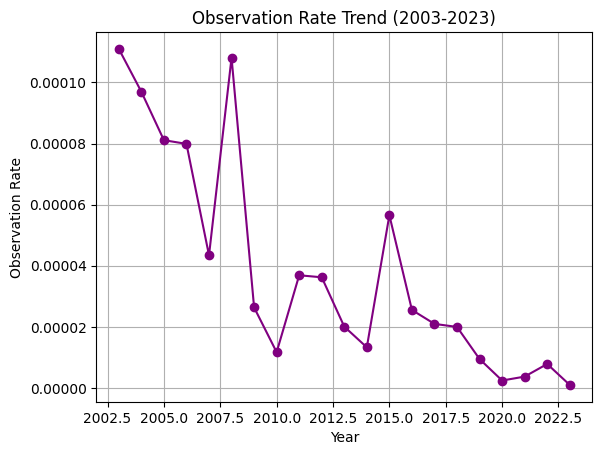

In [39]:
observation_rate_Texas = merged_Texas1['Observation Rate']
years = merged_Texas1['Year']  

plt.plot(years, observation_rate_Texas, marker='o', color='purple')
plt.title('Observation Rate Trend (2003-2023)')
plt.xlabel('Year')
plt.ylabel('Observation Rate')
plt.grid(True)
plt.show()

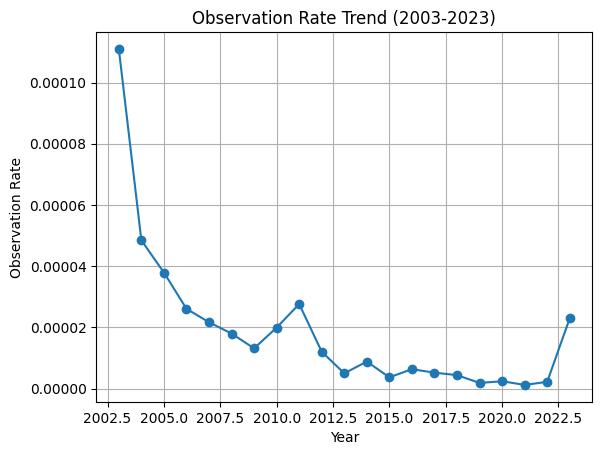

In [40]:
years = range(2003, 2024)
observation_rate_Florida = merged_Florida1['Observation Rate']

plt.plot(years, observation_rate_Florida, marker='o')
plt.title('Observation Rate Trend (2003-2023)')
plt.xlabel('Year')
plt.ylabel('Observation Rate')
plt.grid(True)
plt.show()

Conclusion: We can see that the observation rates of the two cities have shown an overall downward trend, but in recent years, the former has started to rise and then declined, while the latter has shown an upward trend.

We first extract the relevant columns required for EDA analysis and perform a simple EDA analysis on the data.

In [41]:
texas_data = merged_Texas1[['Median AQI', 'Days CO', 'Days NO2', 'Days Ozone', 'Days PM2.5', 'Days PM10','SO2']]
florida_data = merged_Florida1[['Median AQI', 'Days CO', 'Days NO2', 'Days Ozone', 'Days PM2.5', 'Days PM10','SO2']]

# Texas
print("Texas EDA:")
print(texas_data.describe())

# Florida
print("\nFlorida EDA:")
print(florida_data.describe())

Texas EDA:
       Median AQI    Days CO   Days NO2  Days Ozone  Days PM2.5  Days PM10  \
count   21.000000  21.000000  21.000000   21.000000   21.000000  21.000000   
mean    38.488510   0.194793   7.388258  198.315809  122.914287   2.169481   
std      1.929296   0.414143   5.261910   27.140627   27.264081   2.830409   
min     35.488889   0.000000   2.883721  100.886364   52.815789   0.166667   
25%     37.157895   0.024390   3.976190  189.866667  125.024390   0.750000   
50%     38.200000   0.069767   5.022222  202.139535  132.488372   1.069767   
75%     39.790698   0.116279   8.250000  211.380952  136.933333   1.844444   
max     42.243902   1.769231  19.355556  230.500000  149.571429  10.000000   

             SO2  
count  21.000000  
mean    0.983933  
std     0.471360  
min     0.354726  
25%     0.799774  
50%     0.931026  
75%     0.965448  
max     1.929326  

Florida EDA:
       Median AQI    Days CO   Days NO2  Days Ozone  Days PM2.5  Days PM10  \
count   21.000000  21.0

Here we have drawn bar charts and box plots of various data for two cities. In order to facilitate comparative analysis, we have presented the data of both in one chart, making it more intuitive and easier to analyze conclusions.

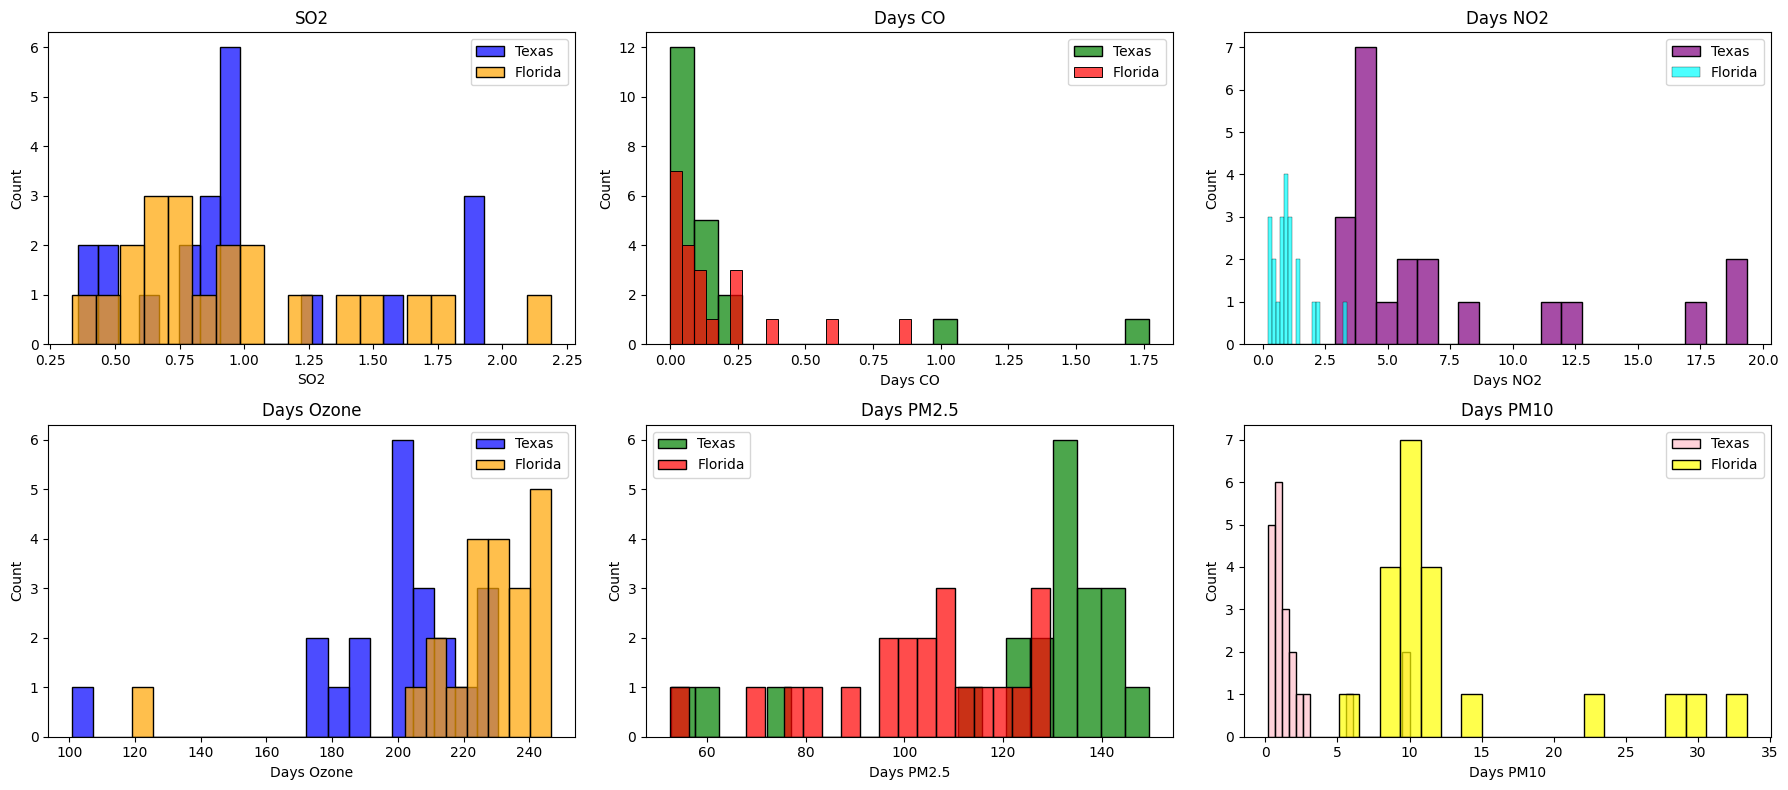

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

#Bar chart
#Set graphic size
plt.figure(figsize=(18, 8))

# SO2
plt.subplot(2, 3, 1)
sns.histplot(texas_data['SO2'], bins=20, color='blue', alpha=0.7, label='Texas')
sns.histplot(florida_data['SO2'], bins=20, color='orange', alpha=0.7, label='Florida')
plt.title('SO2')
plt.legend()

# Days CO
plt.subplot(2, 3, 2)
sns.histplot(texas_data['Days CO'], bins=20, color='green', alpha=0.7, label='Texas')
sns.histplot(florida_data['Days CO'], bins=20, color='red', alpha=0.7, label='Florida')
plt.title('Days CO')
plt.legend()

# Days NO2
plt.subplot(2, 3, 3)
sns.histplot(texas_data['Days NO2'], bins=20, color='purple', alpha=0.7, label='Texas')
sns.histplot(florida_data['Days NO2'], bins=20, color='cyan', alpha=0.7, label='Florida')
plt.title('Days NO2')
plt.legend()

# Days Ozone
plt.subplot(2, 3, 4)
sns.histplot(texas_data['Days Ozone'], bins=20, color='blue', alpha=0.7, label='Texas')
sns.histplot(florida_data['Days Ozone'], bins=20, color='orange', alpha=0.7, label='Florida')
plt.title('Days Ozone')
plt.legend()

# Days PM2.5
plt.subplot(2, 3, 5)
sns.histplot(texas_data['Days PM2.5'], bins=20, color='green', alpha=0.7, label='Texas')
sns.histplot(florida_data['Days PM2.5'], bins=20, color='red', alpha=0.7, label='Florida')
plt.title('Days PM2.5')
plt.legend()

# Days PM10
plt.subplot(2, 3, 6)
sns.histplot(texas_data['Days PM10'], bins=20, color='pink', alpha=0.7, label='Texas')
sns.histplot(florida_data['Days PM10'], bins=20, color='yellow', alpha=0.7, label='Florida')
plt.title('Days PM10')
plt.legend()

plt.tight_layout()
plt.show()

Conclusion: From the six graphs above, we can see that for CO, the overall values of the two cities are concentrated on the smaller content side, and PM10 is also concentrated. Although Florida has some days with higher values, overall they are also concentrated on the lower side. And for the other four data, the data for the two cities is relatively scattered or inconsistent. Therefore, we boldly speculate that the observation rate is likely to have a close relationship with CO and PM10.

In [43]:
texas_data1 = merged_Texas1[['State','SO2', 'Days CO', 'Days NO2', 'Days Ozone', 'Days PM2.5', 'Days PM10']]
florida_data1 = merged_Florida1[['State','SO2', 'Days CO', 'Days NO2', 'Days Ozone', 'Days PM2.5', 'Days PM10']]

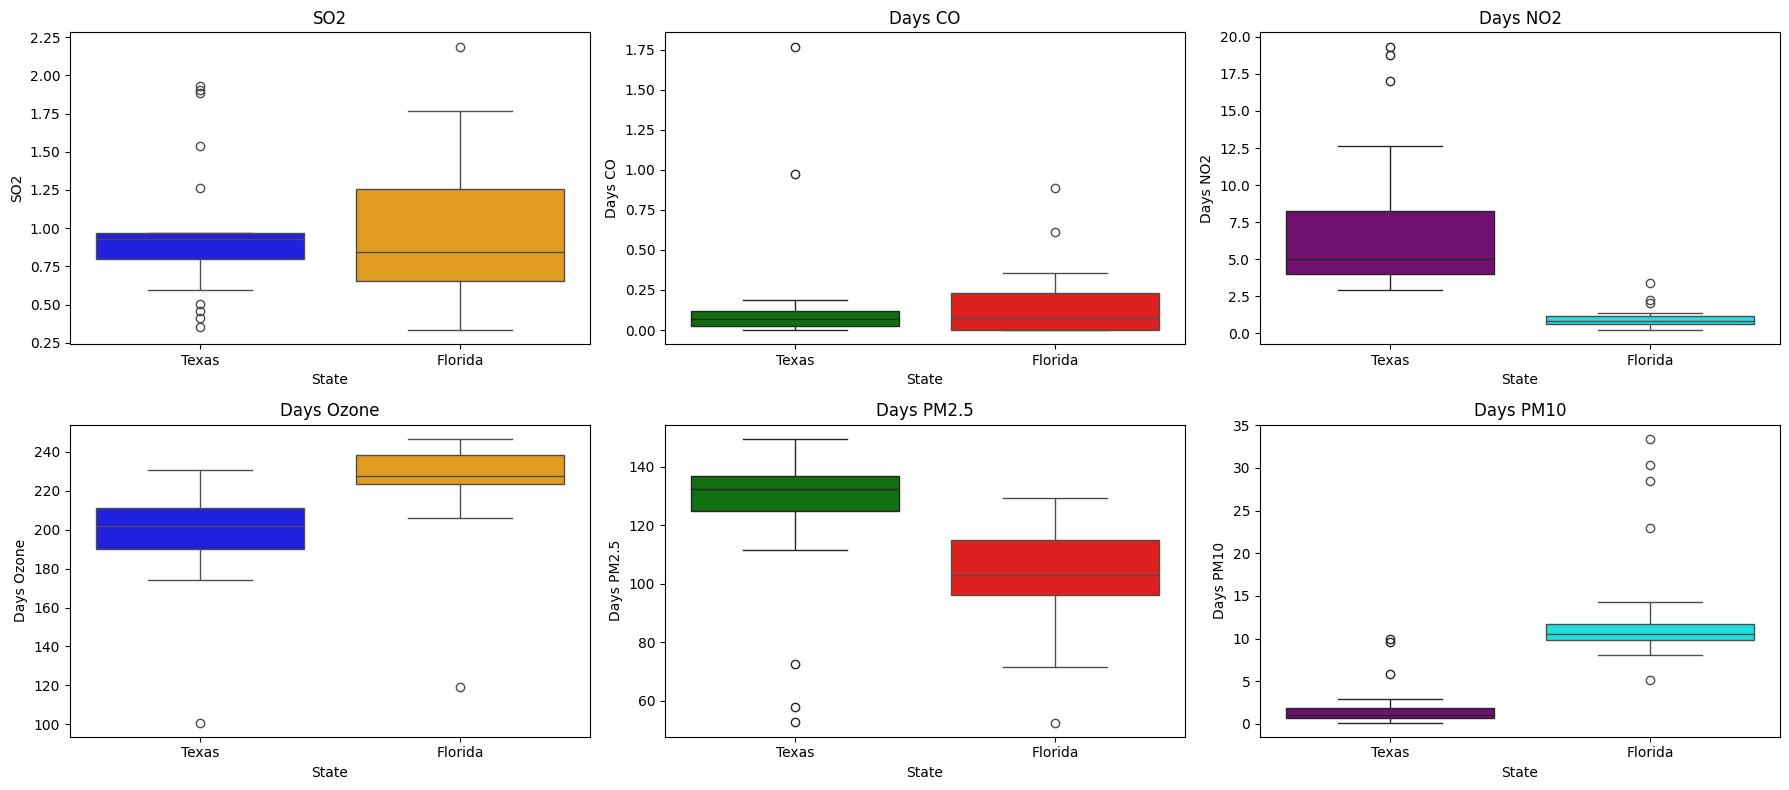

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

#Box plot
#Set graphic size
plt.figure(figsize=(18, 8))

# SO2
plt.subplot(2, 3, 1)
sns.boxplot(x='State', y='SO2', data=texas_data1, color='blue')
sns.boxplot(x='State', y='SO2', data=florida_data1, color='orange')
plt.title('SO2')

# Days CO
plt.subplot(2, 3, 2)
sns.boxplot(x='State', y='Days CO', data=texas_data1, color='green')
sns.boxplot(x='State', y='Days CO', data=florida_data1, color='red')
plt.title('Days CO')

# Days NO2
plt.subplot(2, 3, 3)
sns.boxplot(x='State', y='Days NO2', data=texas_data1, color='purple')
sns.boxplot(x='State', y='Days NO2', data=florida_data1, color='cyan')
plt.title('Days NO2')

# Days Ozone
plt.subplot(2, 3, 4)
sns.boxplot(x='State', y='Days Ozone', data=texas_data1, color='blue')
sns.boxplot(x='State', y='Days Ozone', data=florida_data1, color='orange')
plt.title('Days Ozone')

# Days PM2.5
plt.subplot(2, 3, 5)
sns.boxplot(x='State', y='Days PM2.5', data=texas_data1, color='green')
sns.boxplot(x='State', y='Days PM2.5', data=florida_data1, color='red')
plt.title('Days PM2.5')

# Days PM10
plt.subplot(2, 3, 6)
sns.boxplot(x='State', y='Days PM10', data=texas_data1, color='purple')
sns.boxplot(x='State', y='Days PM10', data=florida_data1, color='cyan')
plt.title('Days PM10')

plt.tight_layout()
plt.show()

Conclusion: By observing the box plot, it is not difficult to see that the results presented by the data are closely related to what we mentioned above. In the subsequent steps, we will focus on observing the two aspects of CO and PM10, which may be closely related to the final conclusion of our analysis.

We generated scatter plots of data related to two cities, showing the relationship between observation rates and a series of air quality indicators (CO, NO2, ozone, PM2.5, PM10, and SO2), and added trend lines to the graphs.

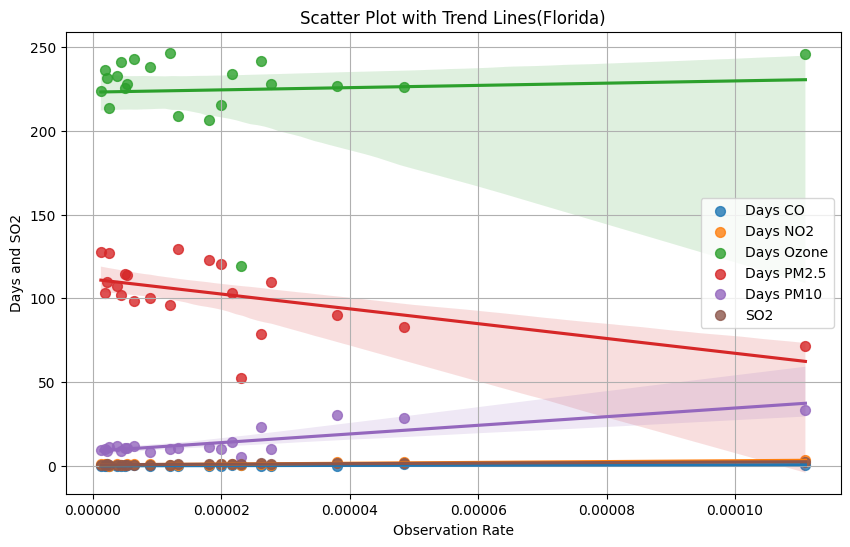

In [45]:
x = merged_Florida1["Observation Rate"]
y_columns =['Days CO', 'Days NO2', 'Days Ozone', 'Days PM2.5', 'Days PM10', 'SO2']
plt.figure(figsize=(10, 6))
for column in y_columns:
    sns.regplot(x=x, y=column, data=merged_Florida1, scatter_kws={"s": 50}, label=column)
plt.legend()
plt.xlabel('Observation Rate')
plt.ylabel('Days and SO2')
plt.title('Scatter Plot with Trend Lines(Florida)')
plt.grid(True)
plt.show()

Conclusion: As we expected, there is a close relationship between CO and PM10 and observation rate. However, in this graph, we also found that SO2 has the same characteristics, which may be closely related to the observation rate.

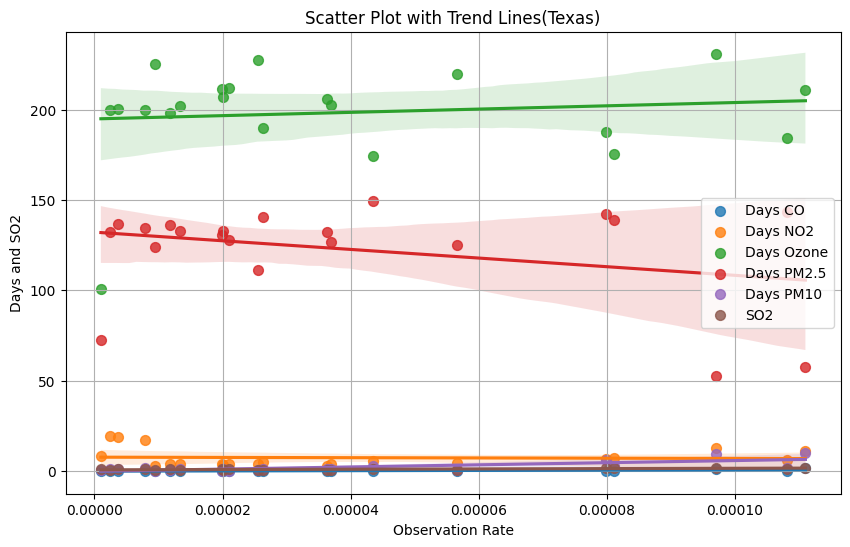

In [46]:
x = merged_Texas1["Observation Rate"]
y_columns = ['Days CO', 'Days NO2', 'Days Ozone', 'Days PM2.5', 'Days PM10', 'SO2']
plt.figure(figsize=(10, 6))
for column in y_columns:
    sns.regplot(x=x, y=column, data=merged_Texas1, scatter_kws={"s": 50}, label=column)
plt.legend()
plt.xlabel('Observation Rate')
plt.ylabel('Days and SO2')
plt.title('Scatter Plot with Trend Lines(Texas)')
plt.grid(True)
plt.show()

Conclusion: As we expected, there is a close relationship between CO and PM10 and observation rate. However, in this graph, we also found that SO2 has the same characteristics, which may be closely related to the observation rate.

We calculated the Pearson correlation coefficients corresponding to six parameters and want to further prove our conclusion. Get a more accurate answer.

In [47]:
from scipy.stats import pearsonr

# Observation Rate
observation_rate_Texas = merged_Texas1['Observation Rate']
observation_rate_Florida = merged_Florida1['Observation Rate']


SO2_Texas = merged_Texas1['SO2']
days_co_Texas = merged_Texas1['Days CO']
days_no2_Texas = merged_Texas1['Days NO2']
days_ozone_Texas = merged_Texas1['Days Ozone']
days_pm25_Texas = merged_Texas1['Days PM2.5']
days_pm10_Texas = merged_Texas1['Days PM10']

SO2_Florida = merged_Florida1['SO2']
days_co_Florida = merged_Florida1['Days CO']
days_no2_Florida = merged_Florida1['Days NO2']
days_ozone_Florida = merged_Florida1['Days Ozone']
days_pm25_Florida = merged_Florida1['Days PM2.5']
days_pm10_Florida = merged_Florida1['Days PM10']

# Calculate Pearson correlation coefficient
pearson_SO2_Texas, _ = pearsonr(observation_rate_Texas, SO2_Texas)
pearson_days_co_Texas, _ = pearsonr(observation_rate_Texas, days_co_Texas)
pearson_days_no2_Texas, _ = pearsonr(observation_rate_Texas, days_no2_Texas)
pearson_days_ozone_Texas, _ = pearsonr(observation_rate_Texas, days_ozone_Texas)
pearson_days_pm25_Texas, _ = pearsonr(observation_rate_Texas, days_pm25_Texas)
pearson_days_pm10_Texas, _ = pearsonr(observation_rate_Texas, days_pm10_Texas)

pearson_SO2_Florida, _ = pearsonr(observation_rate_Florida, SO2_Florida)
pearson_days_co_Florida, _ = pearsonr(observation_rate_Florida, days_co_Florida)
pearson_days_no2_Florida, _ = pearsonr(observation_rate_Florida, days_no2_Florida)
pearson_days_ozone_Florida, _ = pearsonr(observation_rate_Florida, days_ozone_Florida)
pearson_days_pm25_Florida, _ = pearsonr(observation_rate_Florida, days_pm25_Florida)
pearson_days_pm10_Florida, _ = pearsonr(observation_rate_Florida, days_pm10_Florida)

print("Texas:")
print("SO2：", pearson_SO2_Texas)
print("Days CO：", pearson_days_co_Texas)
print("Days NO2：", pearson_days_no2_Texas)
print("Days Ozone：", pearson_days_ozone_Texas)
print("Days PM2.5：", pearson_days_pm25_Texas)
print("Days PM10：", pearson_days_pm10_Texas)

print("\nFlorida:")
print("SO2：", pearson_SO2_Florida)
print("Days CO：", pearson_days_co_Florida)
print("Days NO2：", pearson_days_no2_Florida)
print("Days Ozone：", pearson_days_ozone_Florida)
print("Days PM2.5：", pearson_days_pm25_Florida)
print("Days PM10：", pearson_days_pm10_Florida)

Texas:
SO2： 0.6542227837411038
Days CO： 0.5999230462684074
Days NO2： -0.04789491563365129
Days Ozone： 0.11985211173012815
Days PM2.5： -0.3146092584823269
Days PM10： 0.7483568016353136

Florida:
SO2： 0.842211082333134
Days CO： 0.6509998967540751
Days NO2： 0.8218959228646093
Days Ozone： 0.061700730616565516
Days PM2.5： -0.5555018078264853
Days PM10： 0.8053894968898431


For Texas observation rate:

The Pearson correlation coefficient of SO2 indicates a certain degree of positive correlation, but it is not very strong.

The Pearson correlation coefficient of Days CO indicates a certain degree of positive correlation.

The Pearson correlation coefficient of Days NO2 is close to zero, indicating that there is almost no linear relationship between the two.

The Pearson correlation coefficient of Days Zone indicates a certain degree of positive correlation, but the relationship is not very strong.

The Pearson correlation coefficient of Days PM2.5 shows a certain degree of negative correlation, but it is not very strong.

The Pearson correlation coefficient of Days PM10 indicates a strong positive correlation.

For Florida's observation rate:

The Pearson correlation coefficient of SO2 indicates a certain degree of positive correlation, but the relationship is weak.

The Pearson correlation coefficient of Days CO indicates a strong positive correlation.

The Pearson correlation coefficient of Days NO2 indicates a strong positive correlation.

The Pearson correlation coefficient of Days Zone is close to zero, indicating that there is almost no linear relationship between the two.

The Pearson correlation coefficient of Days PM2.5 indicates a certain degree of negative correlation, but the relationship is strong.

The Pearson correlation coefficient of Days PM10 indicates a strong positive correlation.

Overall, it is indeed mainly determined by CO and PM10.

We used various data from two cities to draw heat maps for data analysis.

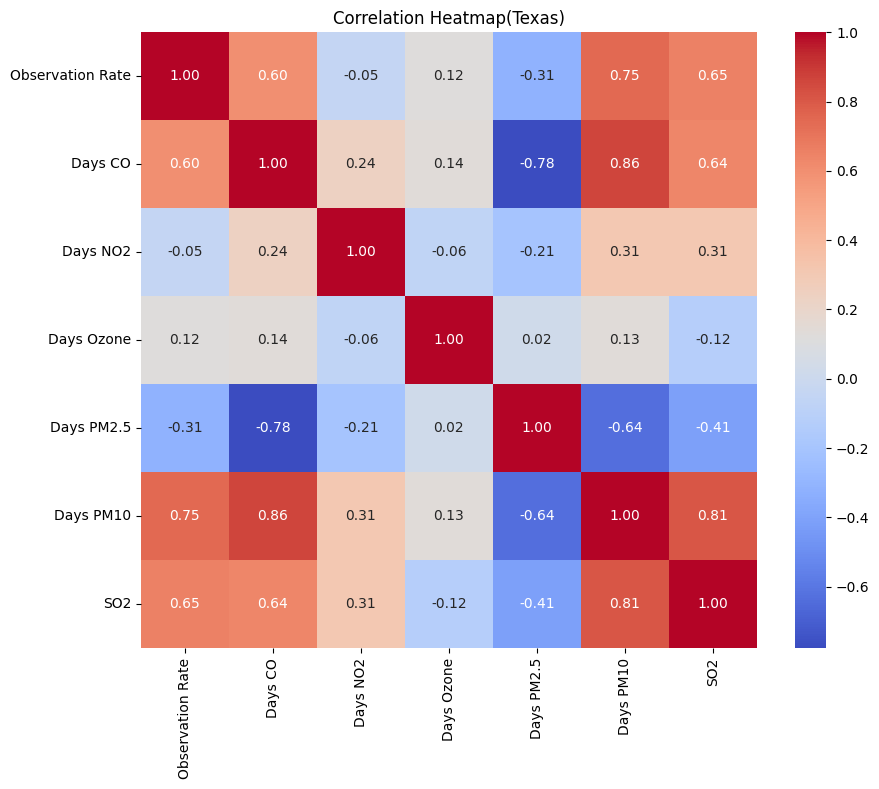

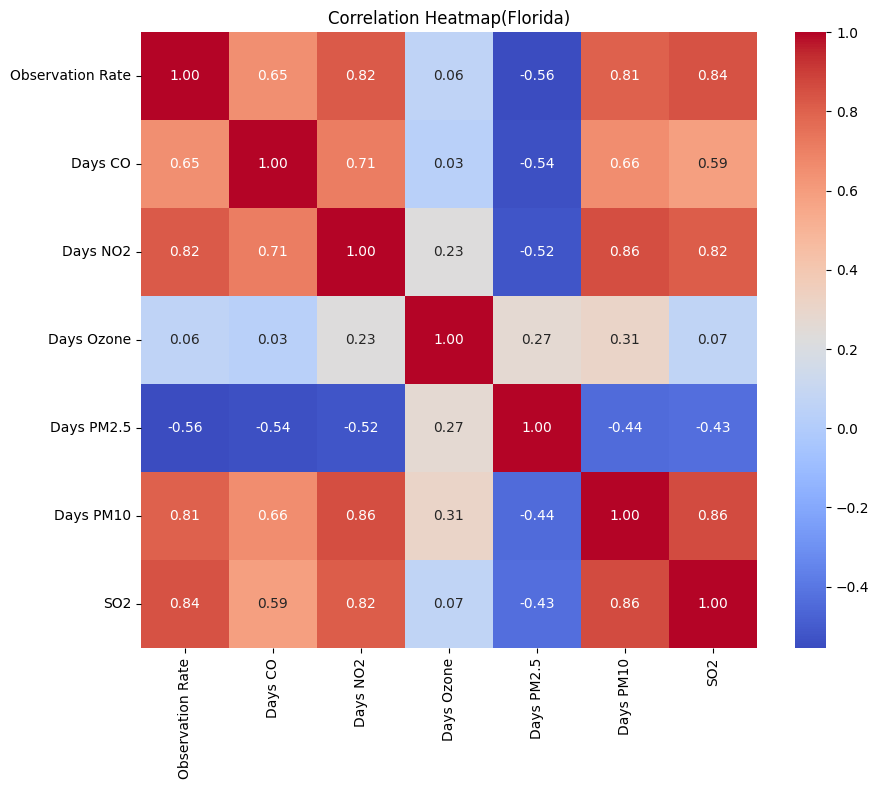

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

seven_parameters = ['Observation Rate', 'Days CO', 'Days NO2', 'Days Ozone', 'Days PM2.5', 'Days PM10', 'SO2']

# Calculate the correlation coefficient matrix
correlation_matrix_texas = merged_Texas1[seven_parameters].corr()
correlation_matrix = merged_Florida1[seven_parameters].corr()

# Create heat map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_texas, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap(Texas)')
plt.show()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap(Florida)')
plt.show()

Conclusion: Previously, we confirmed that C0 and PM10 are still closely related to observation rates. At the same time, the SO2 we started to pay attention to later is also closely related to the observation rate. From this perspective, we can basically confirm that SO2 is equally important for observation rate.

We rated various data based on the previously calculated Pearson correlation coefficient.

In [49]:
def pollution_grade(pearson_coefficient):
    if pearson_coefficient >= 0.7:
        return "Strongly Positive Correlation: Severe Pollution"
    elif 0.5 <= pearson_coefficient < 0.7:
        return "Moderate Positive Correlation: Moderate Pollution"
    elif 0.3 <= pearson_coefficient < 0.5:
        return "Weak Positive Correlation: Light Pollution"
    elif -0.3 < pearson_coefficient < 0.3:
        return "No or Weak Correlation: Little to No Pollution"
    elif -0.5 <= pearson_coefficient < -0.3:
        return "Weak Negative Correlation: Light Pollution"
    elif -0.7 <= pearson_coefficient < -0.5:
        return "Moderate Negative Correlation: Moderate Pollution"
    else:
        return "Strongly Negative Correlation: Severe Pollution"

print("Texas:")
print("SO2 Pollution Grade:", pollution_grade(pearson_SO2_Texas))
print("CO Pollution Grade:", pollution_grade(pearson_days_co_Texas))
print("NO2 Pollution Grade:", pollution_grade(pearson_days_no2_Texas))
print("Ozone Pollution Grade:", pollution_grade(pearson_days_ozone_Texas))
print("PM2.5 Pollution Grade:", pollution_grade(pearson_days_pm25_Texas))
print("PM10 Pollution Grade:", pollution_grade(pearson_days_pm10_Texas))

print("\nFlorida:")
print("SO2 Pollution Grade:", pollution_grade(pearson_SO2_Florida))
print("CO Pollution Grade:", pollution_grade(pearson_days_co_Florida))
print("NO2 Pollution Grade:", pollution_grade(pearson_days_no2_Florida))
print("Ozone Pollution Grade:", pollution_grade(pearson_days_ozone_Florida))
print("PM2.5 Pollution Grade:", pollution_grade(pearson_days_pm25_Florida))
print("PM10 Pollution Grade:", pollution_grade(pearson_days_pm10_Florida))

Texas:
SO2 Pollution Grade: Moderate Positive Correlation: Moderate Pollution
CO Pollution Grade: Moderate Positive Correlation: Moderate Pollution
NO2 Pollution Grade: No or Weak Correlation: Little to No Pollution
Ozone Pollution Grade: No or Weak Correlation: Little to No Pollution
PM2.5 Pollution Grade: Weak Negative Correlation: Light Pollution
PM10 Pollution Grade: Strongly Positive Correlation: Severe Pollution

Florida:
SO2 Pollution Grade: Strongly Positive Correlation: Severe Pollution
CO Pollution Grade: Moderate Positive Correlation: Moderate Pollution
NO2 Pollution Grade: Strongly Positive Correlation: Severe Pollution
Ozone Pollution Grade: No or Weak Correlation: Little to No Pollution
PM2.5 Pollution Grade: Moderate Negative Correlation: Moderate Pollution
PM10 Pollution Grade: Strongly Positive Correlation: Severe Pollution


### Conclusion:
In summary, we believe that SO2, PM10, and CO are closely related to the observation rate. In addition, we can observe that there are certain differences in other parameters between the two regions, with NO2 being the most obvious. After analysis, we believe that this may be mainly due to traffic density and industrial activities, and NO2 is mainly generated by automobile exhaust and industrial emissions. Therefore, if the traffic density or industrial activity level of two regions are different, it will lead to differences in NO2 levels between them, and from this point, it is not difficult to see that the population density of the two regions will also be different. This is because population density is often positively correlated with traffic density and industrial activity level. In addition, differences in other parameters may also be caused by geographical factors. The different environments in urban and rural areas often lead to differences in gas production, and the same industrial structure can also have a certain impact on this. Regions dominated by heavy industry often have higher levels of pollutant gas content. Due to different cities, the government's relevant management policies may also vary, which naturally leads to differences in data between parameters. The main purpose of this experiment is to clarify what factors affect the distribution of the bird population. Through the analysis of various graphs and data above, we can infer that the distribution of this species population may be mainly influenced by the content of these three gases in various cities. This has significant practical significance. If various regions want to continue maintaining biodiversity and ensure that this bird population can have a large distribution in their cities instead of becoming extinct, they need to pay attention to the development situation and policies of the region, and try to control the content of these three gases in the atmosphere within an appropriate range. 
At the same time, it is also a warning that we should always pay attention to the environment and not let development damage the environment ultimately lead to a sharp decline in biodiversity.